In [1]:
from pathlib import Path
import torchvision as tv
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
import torch
from torch.nn import Sequential
from torch.utils.data import DataLoader
import pytorch_lightning as pl

from kornia import augmentation as T

/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
show = to_pil_image

In [3]:
from amoug import AmougRCNNModel, AmougDataset, collate_fn, visualize

In [4]:
augmentation = Sequential(
    T.ColorJitter(brightness=0.5, hue=0.5, contrast=0.5),
    T.RandomElasticTransform(),
    T.RandomGaussianBlur(kernel_size=(9, 9), sigma=(0.1, 2.0)),
    T.RandomGrayscale(p=0.1),
    T.RandomSolarize(),
    T.RandomInvert(p=0.1),
)

In [5]:
ds = AmougDataset("test_data", transform=tv.transforms.ConvertImageDtype(torch.float32))
data = DataLoader(ds, batch_size=4, num_workers=12, collate_fn=collate_fn)

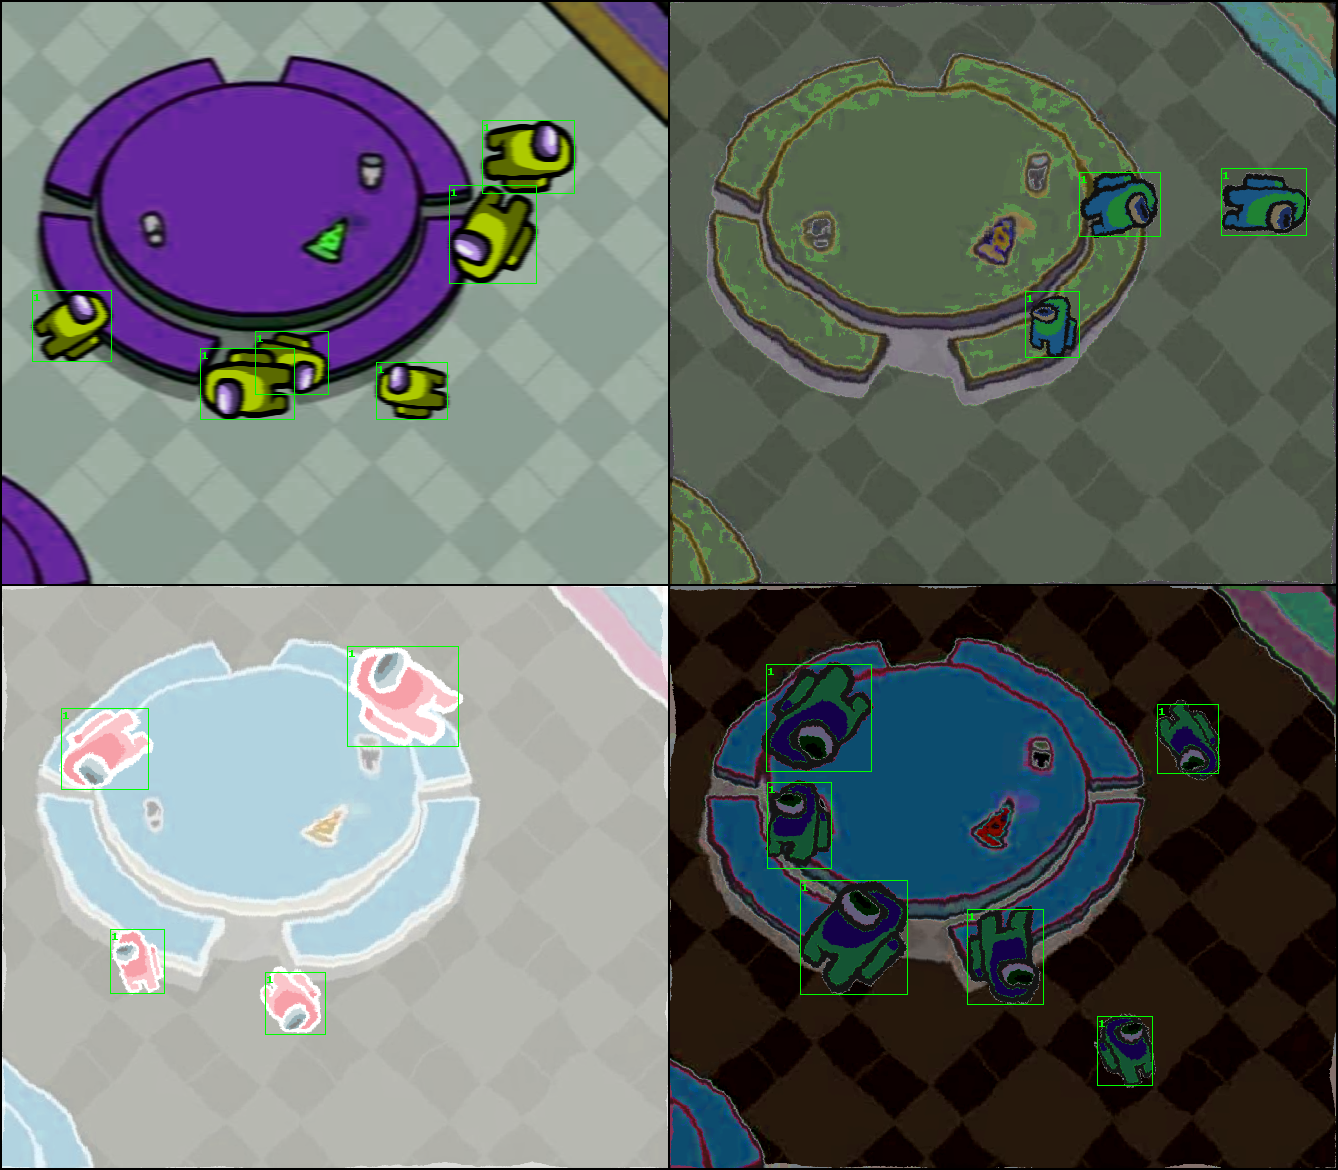

In [6]:
imgs, targets = next(iter(data))


show(visualize(augmentation(imgs), targets))

In [7]:
trainer = pl.Trainer(accelerator="auto")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [8]:
model_paths = [path for path in Path("models/FastRCNN").iterdir()]

In [9]:
for model_path in model_paths:
    print(f"MODEL={model_path}")
    model = AmougRCNNModel.load_from_checkpoint(
        model_path, 
        augmentation=augmentation,
        augment_non_train=True
    )
    model.freeze()
    print(trainer.validate(model, dataloaders=data))
    print(trainer.test(model, data))

MODEL=models/FastRCNN/FR-v2-d1000.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0:   1%|▏         | 1/75 [00:00<01:07,  1.10it/s]

/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/pytorch_lightning/utilities/data.py:86: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.17963871359825134
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'val_loss': 0.17963871359825134}]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 75/75 [01:41<00:00,  1.35s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.8118676543235779
     test_map:map_50          0.9463591575622559
     test_map:map_75          0.9364708662033081
    test_map:map_large        0.8292901515960693
   test_map:map_medium        0.7907193899154663
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9426666498184204
      test_map:mar_1         0.19007988274097443
     test_map:mar_10          0.8403760194778442
     test_map:mar_100         0.8403760194778442
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.8710999488830566
   test_map:mar_medium        0.8249276280403137
    test_map:mar_sm

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.24741142988204956
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.24741142988204956}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:51<00:00,  1.48s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.6782077550888062
     test_map:map_50          0.8756285309791565
     test_map:map_75          0.7969642281532288
    test_map:map_large        0.6541410684585571
   test_map:map_medium         0.66971355676651
  test_map:map_per_class             -1.0
    test_map:map_small        -0.957777738571167
      test_map:mar_1         0.17715679109096527
     test_map:mar_10          0.7274635434150696
     test_map:mar_100         0.7338728308677673
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.7479587197303772
   test_map:mar_medium        0.7

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.19256602227687836
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.19256602227687836}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:40<00:00,  1.34s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7774655222892761
     test_map:map_50          0.9333786964416504
     test_map:map_75          0.9087403416633606
    test_map:map_large        0.7710382342338562
   test_map:map_medium        0.767666757106781
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9466666579246521
      test_map:mar_1          0.1870422512292862
     test_map:mar_10          0.8093517422676086
     test_map:mar_100         0.8106930255889893
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.8161182999610901
   test_map:mar_medium        0.8

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.24031244218349457
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.24031244218349457}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:46<00:00,  1.42s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7182891368865967
     test_map:map_50          0.9170824289321899
     test_map:map_75          0.8447759747505188
    test_map:map_large        0.6383855938911438
   test_map:map_medium        0.7177430987358093
  test_map:map_per_class             -1.0
    test_map:map_small        -0.95333331823349
      test_map:mar_1         0.17914171516895294
     test_map:mar_10          0.7703744769096375
     test_map:mar_100         0.7762393951416016
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.7577301859855652
   test_map:mar_medium        0.7